In [2]:
#!pip3 install -r requirements.txt

In [1]:
# import sys
# !{sys.executable} -m spacy download en_core_web_lg

In [3]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import spacy
from collections import Counter

In [4]:
warnings.filterwarnings("ignore")

In [4]:
# labels that were not considered mood
not_moods_labels = ['acoustic', 'adrenaline', 'atmosphere', 'ballroom', 
            'beat', 'bizarre', 'brit pop', 'catchy', 'chic', 
            'city', 'club', 'country rock', 'countryside', 'dance pop',
           'desolation', 'disco 70', 'electronic', 'fast', 'folk contemporaneo',
           'funk', 'funk rock', 'gentle', 'glamour', 'groove', 'hard rock', 'hip-hop',
           'holiday', 'melodic', 'movement', 'new wave', 'night', 'noise', 'psychic',
           'punk', 'r&b', 'rap', 'reggae', 'remembrance', 'repetitive', 'rhythm and blues', 
            'rock & roll', 'rock blues', 'rock pop', 'slow', 'smooth', 'soft', 'soft pop',
           'soul', 'space', 'suggestive', 'summertime', 'traditional blues', 'travel', 'vintage']

In [12]:
labels = pd.read_csv('../../data/tag_list.csv')

labels.columns = ['Labels']
labels_list = labels['Labels'].value_counts().keys().to_list()

In [13]:
moods = set(labels_list) - set(not_moods_labels)

In [14]:
moods = list(moods)

In [19]:
moods

['powerful',
 'insistent',
 'psychedelic',
 'chaotic',
 'lazy',
 'playful',
 'love',
 'energy',
 'agitated',
 'obsessive',
 'confused',
 'soulful',
 'frantic',
 'anxiety',
 'enthusiastic',
 'angry',
 'strong',
 'weird',
 'lonely',
 'romantic',
 'mellow',
 'delicate',
 'hopeful',
 'passionate',
 'carefree',
 'sexy',
 'intimate',
 'aggressive',
 'evocative',
 'cheerful',
 'exciting',
 'confident',
 'bright',
 'melancholic',
 'emotional',
 'determined',
 'despair',
 'breezy',
 'intense',
 'light']

In [15]:
sim_scores = np.zeros((40, 40))

In [10]:
nlp = spacy.load('en_core_web_lg')

In [20]:
#evaluate the similarty scores
for i in range(len(moods)):
    for j in range(len(moods)):
        token1 = nlp(moods[i])[0]
        token2 = nlp(moods[j])[0]
        score = token1.similarity(token2)
        print(score)
        sim_scores[i][j] = score

1.0
0.4526577591896057
0.35211217403411865
0.3385098874568939
0.01319054327905178
0.2778562307357788
0.2864663004875183
0.47839051485061646
0.37497276067733765
0.4513998329639435
0.3661658465862274
0.2629745304584503
0.2409980297088623
0.2802318036556244
0.478268563747406
0.15827232599258423
0.6668552160263062
0.10862468928098679
0.09990333765745163
0.275577574968338
0.26759761571884155
0.49529367685317993
0.3284415602684021
0.5182721018791199
0.2478691041469574
0.08877470344305038
0.4459514617919922
0.6042859554290771
0.538216233253479
0.3349725008010864
0.5281263589859009
0.5276293158531189
0.4337167739868164
0.2928621470928192
0.5003154277801514
0.3989855945110321
0.22670617699623108
0.09897108376026154
0.5993320345878601
0.46174925565719604
0.4526577591896057
1.0
0.2514069974422455
0.35271942615509033
0.13205361366271973
0.21336978673934937
0.33126750588417053
0.3134773373603821
0.47454187273979187
0.5221397280693054
0.5415850877761841
0.1812448799610138
0.40597838163375854
0.37271

0.1812448799610138
0.4856329560279846
0.2320752590894699
0.14237675070762634
0.5364281535148621
0.3645235300064087
0.11919234693050385
-0.00435178866609931
0.18657159805297852
0.01572679914534092
1.0
0.25175049901008606
0.0885012075304985
0.2324066013097763
0.1330622285604477
0.18166552484035492
0.26062503457069397
0.2922001779079437
0.4098811745643616
0.5844236612319946
0.3294457197189331
0.2556264102458954
0.341327965259552
0.36719951033592224
0.37308064103126526
0.3419017493724823
0.05865968018770218
0.4481213092803955
0.5030983686447144
0.20438311994075775
0.15707746148109436
0.2452266812324524
0.6268212795257568
0.25811678171157837
-0.11478855460882187
0.2708226442337036
0.5066853761672974
0.20871053636074066
0.09786589443683624
0.2409980297088623
0.40597838163375854
0.3055199682712555
0.5867279767990112
0.19117805361747742
0.3195692002773285
0.2202020287513733
0.13007058203220367
0.3564002811908722
0.45854321122169495
0.3558642268180847
0.25175049901008606
1.0
0.31944650411605835

0.4263589382171631
0.33150842785835266
0.18057583272457123
0.3350642919540405
0.49438658356666565
0.5081312656402588
0.3284415602684021
0.5455794930458069
0.24892231822013855
0.37504255771636963
0.14703838527202606
0.3178521692752838
0.42019036412239075
0.19279319047927856
0.2487824410200119
0.3238750398159027
0.39329564571380615
0.2556264102458954
0.36461958289146423
0.3253902792930603
0.4815494418144226
0.3791799247264862
0.40664389729499817
0.3022855222225189
0.33573752641677856
0.32846882939338684
0.19018827378749847
0.23679517209529877
1.0
0.46319741010665894
0.3527489900588989
0.12390318512916565
0.3057219088077545
0.3097137212753296
0.21489913761615753
0.48970067501068115
0.504485011100769
0.6321487426757812
0.36302489042282104
0.3147749602794647
0.3059338927268982
0.273862361907959
0.39630112051963806
0.2001032531261444
0.34154441952705383
0.17464061081409454
0.5182721018791199
0.49888351559638977
0.33289769291877747
0.2194247841835022
0.07045561820268631
0.448108047246933
0.55

0.5669811964035034
0.46216297149658203
0.2592989504337311
0.5181071162223816
0.38366806507110596
0.16404519975185394
0.31824806332588196
0.4394109547138214
0.3919067084789276
0.6268212795257568
0.4140770137310028
0.43020880222320557
0.35715603828430176
0.2744692862033844
0.2667575776576996
0.3400188684463501
0.46382516622543335
0.5937094688415527
0.5784791707992554
0.4070032835006714
0.3147749602794647
0.37117084860801697
0.4561541974544525
0.19365006685256958
0.44295772910118103
0.27214884757995605
0.618979811668396
0.549423098564148
0.2824937701225281
0.25341784954071045
0.37586405873298645
1.0
0.4508046805858612
0.148076131939888
0.4956322908401489
0.41675812005996704
0.4256384074687958
0.269205242395401
0.5003154277801514
0.48973503708839417
0.3792847692966461
0.3767186105251312
0.0018170686671510339
0.34790319204330444
0.3252771198749542
0.4349798262119293
0.35997530817985535
0.5462167263031006
0.39381247758865356
0.25811678171157837
0.33154770731925964
0.636253833770752
0.4389761

In [21]:
sim_df = pd.DataFrame(sim_scores, index=[i for i in moods])
sim_df.columns = moods

In [22]:
sim_df

,powerful,insistent,psychedelic,chaotic,lazy,playful,love,energy,agitated,obsessive,...,exciting,confident,bright,melancholic,emotional,determined,despair,breezy,intense,light
powerful,1.000000,0.452658,0.352112,0.338510,0.013191,0.277856,0.286466,0.478391,0.374973,0.451400,...,0.528126,0.527629,0.433717,0.292862,0.500315,0.398986,0.226706,0.098971,0.599332,0.461749
insistent,0.452658,1.000000,0.251407,0.352719,0.132054,0.213370,0.331268,0.313477,0.474542,0.522140,...,0.361051,0.680845,0.322674,0.354161,0.489735,0.536215,0.347064,0.068324,0.538038,0.295291
psychedelic,0.352112,0.251407,1.000000,0.379439,0.064582,0.436343,0.313180,0.213149,0.173991,0.439911,...,0.387832,0.195776,0.336000,0.566981,0.379285,0.107662,0.225998,0.276348,0.379604,0.274304
chaotic,0.338510,0.352719,0.379439,1.000000,0.217782,0.307807,0.202352,0.190597,0.425545,0.476507,...,0.374036,0.279205,0.302431,0.462163,0.376719,0.236528,0.454793,0.225021,0.482931,0.246220
lazy,0.013191,0.132054,0.064582,0.217782,1.000000,0.272988,0.165050,-0.036232,0.114239,0.268231,...,0.033167,0.078308,0.117933,0.259299,0.001817,-0.062920,0.129134,0.324981,0.029435,-0.014465
playful,0.277856,0.213370,0.436343,0.307807,0.272988,1.000000,0.467775,0.106327,0.122758,0.375062,...,0.474202,0.276112,0.470123,0.518107,0.347903,0.005926,0.150712,0.519467,0.307935,0.245229
love,0.286466,0.331268,0.313180,0.202352,0.165050,0.467775,1.000000,0.146418,0.083518,0.421445,...,0.381720,0.353678,0.353179,0.383668,0.325277,0.070517,0.423946,0.246325,0.313384,0.226093
energy,0.478391,0.313477,0.213149,0.190597,-0.036232,0.106327,0.146418,1.000000,0.180637,0.254982,...,0.367362,0.365966,0.364589,0.164045,0.434980,0.367818,0.135977,0.107684,0.508332,0.513445
agitated,0.374973,0.474542,0.173991,0.425545,0.114239,0.122758,0.083518,0.180637,1.000000,0.411800,...,0.264385,0.402756,0.262526,0.318248,0.359975,0.534780,0.318805,-0.040677,0.466158,0.273498
obsessive,0.451400,0.522140,0.439911,0.476507,0.268231,0.375062,0.421445,0.254982,0.411800,1.000000,...,0.485729,0.418996,0.348015,0.439411,0.546217,0.326721,0.379370,0.088241,0.596979,0.297423


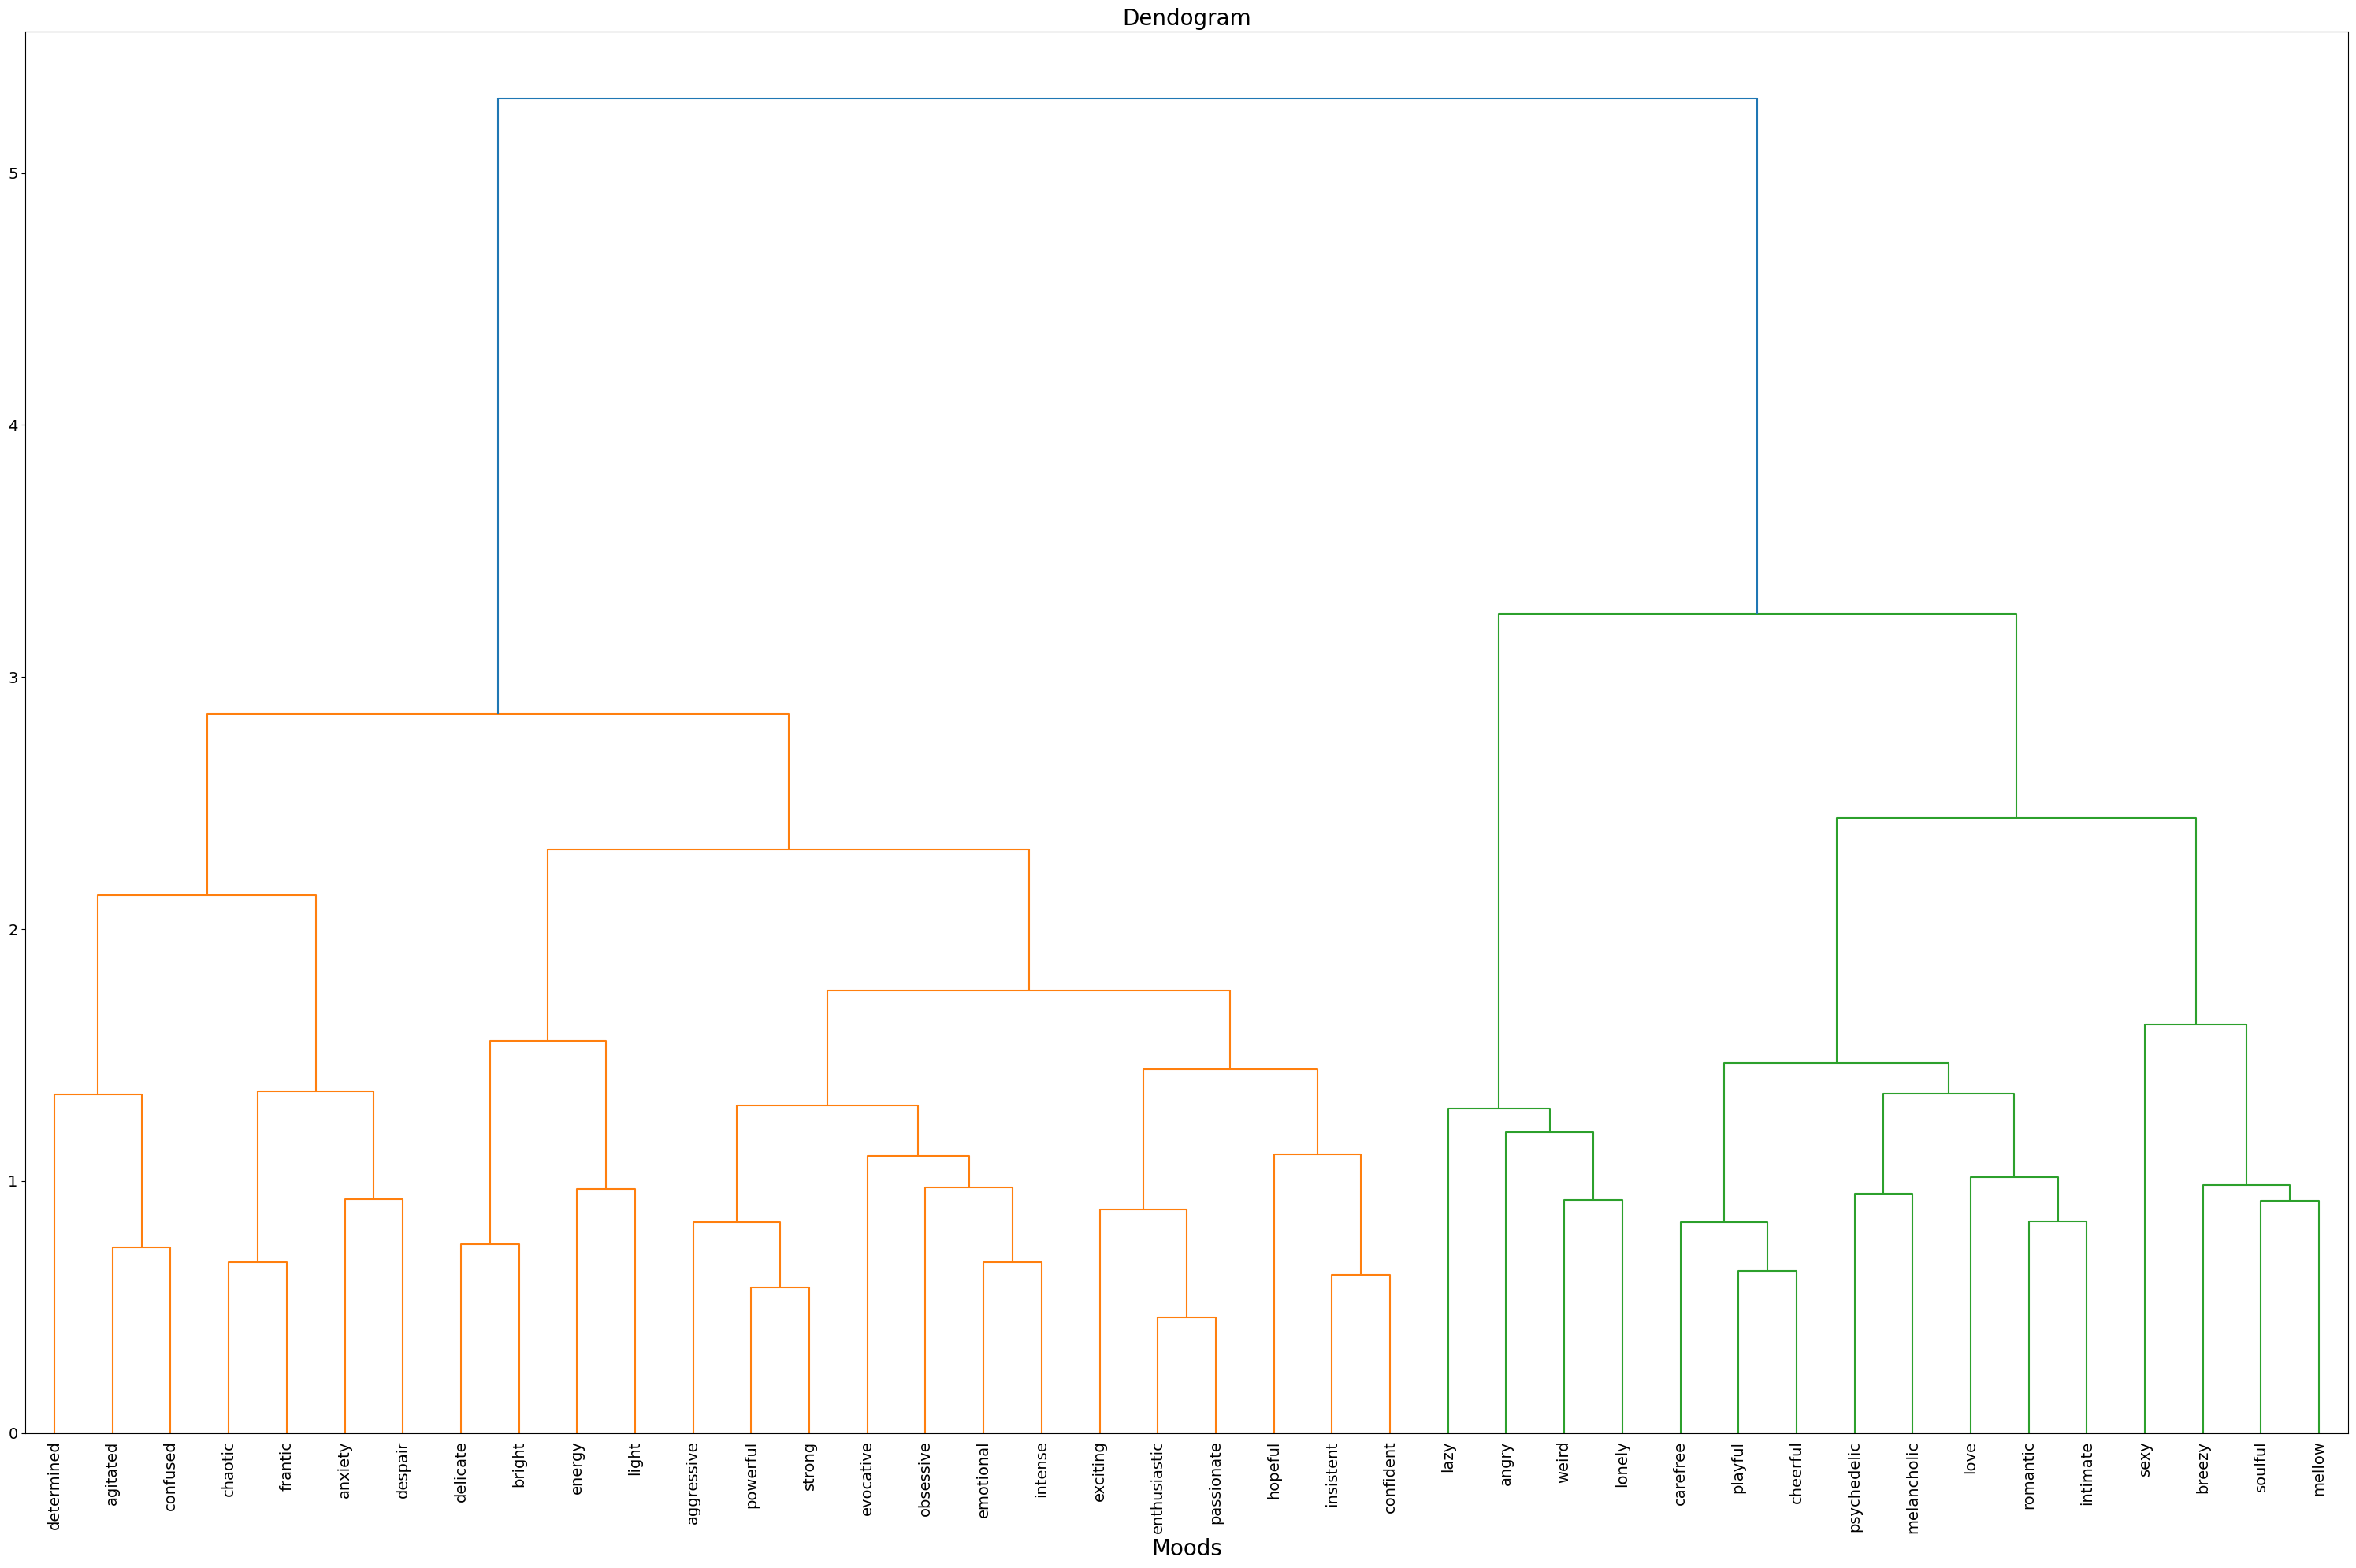

In [24]:
#hierarchical clustering using ward linkage
plt.figure(figsize=(30, 20))
linkage_matrix = linkage(sim_df, "ward")
dendrogram(linkage_matrix, labels=moods)
plt.title("Dendogram", fontsize=20)
plt.xticks(fontsize=14, rotation='vertical')
plt.yticks(fontsize=14)
plt.xlabel("Moods", fontsize=20)

plt.tight_layout()
plt.savefig('../../plots/moods_similariy_hierarchy2.png')
plt.show()

--------

## Train Set Label Processing

In [26]:
songs_and_tags_train = pd.read_csv('../../data/train.csv', sep='\t')
songs_and_tags_train.columns = ['SONG_ID', 'TAG']

In [28]:
songs_and_tags_train = songs_and_tags_train[~songs_and_tags_train.TAG.isin(not_moods_labels)]
songs_and_tags_train.columns = ['SONG_ID', 'MOODS']

In [29]:
#grouping the tags
bright = ['bright', 'light', 'exciting']
love = ['delicate', 'intimate', 'romantic', 'love', 'sexy']
relaxed = ['psychedelic', 'evocative', 'soulful', 'melancholic', 'mellow', 'lazy']
happy = ['cheerful', 'playful', 'breezy', 'carefree']
n_strong = ['angry', 'chaotic', 'obsessive', 'emotional', 'insistent', 'agitated', 'intense']
n_down = ['confused', 'lonely', 'anxiety', 'despair', 'frantic']
optimistic = ['confident', 'hopeful', 'enthusiastic', 'passionate']
headstrong = ['determined', 'energy', 'aggressive', 'powerful', 'strong']
weird = ['weird']

In [30]:
def assign_key(x):
    if x in bright:
        return 'bright'
    if x in love:
        return 'love'
    if x in relaxed:
        return 'relaxed'
    if x in happy:
        return 'happy'
    if x in n_strong:
        return 'n_strong'
    if x in n_down:
        return 'n_down'
    if x in optimistic:
        return 'optimistic'
    if x in headstrong:
        return 'headstrong'
    if x in weird:
        return 'weird'

In [31]:
songs_and_tags_train['NEW_MOODS'] = songs_and_tags_train['MOODS'].apply(lambda x : assign_key(x))

In [32]:
mood_song_tags = songs_and_tags_train.groupby('SONG_ID')['NEW_MOODS'].apply(list).reset_index(name='MOOD_LIST')

In [33]:
def count_labels(lst):
    ct = Counter(lst)
    max_value = max(ct.values())
    return sorted(key for key, value in ct.items() if value == max_value)

In [34]:
counts = {}
moods_all_list = []
for i in range(len(mood_song_tags)):  #get the majority counts
    lst = mood_song_tags['MOOD_LIST'][i]
    counts[mood_song_tags['SONG_ID'][i]] = count_labels(lst)
    moods_all_list.append(count_labels(lst)) #add all the tags with majority counts

In [35]:
list(counts.values())[0]

['happy', 'optimistic', 'weird']

In [36]:
#create priority because we have more than one label for a song 
#n_strong>n_down>happy>love>optimistic>relaxed>headstrong>weird>bright
counts_values = list(counts.values()) 
for i in range(len(counts)):
    if len(counts_values[i]) > 1: #if there is more than one majority then priority is applied
        if 'n_strong' in counts_values[i]:
            counts_values[i] = ['n_strong']
            counts[mood_song_tags['SONG_ID'][i]] = counts_values[i]
        elif 'n_down' in counts_values[i]:
            counts_values[i] = ['n_down']
            counts[mood_song_tags['SONG_ID'][i]] = counts_values[i]
        elif 'happy' in counts_values[i]:
            counts_values[i] = ['happy']
            counts[mood_song_tags['SONG_ID'][i]] = counts_values[i]
        elif 'love' in counts_values[i]:
            counts_values[i] = ['love']
            counts[mood_song_tags['SONG_ID'][i]] = counts_values[i]
        elif 'optimistic' in counts_values[i]:
            counts_values[i] = ['optimistic']
            counts[mood_song_tags['SONG_ID'][i]] = counts_values[i]
        elif 'relaxed' in counts_values[i]:
            counts_values[i] = ['relaxed']
            counts[mood_song_tags['SONG_ID'][i]] = counts_values[i]
        elif 'headstrong' in counts_values[i]:
            counts_values[i] = ['headstrong']
            counts[mood_song_tags['SONG_ID'][i]] = counts_values[i]
        elif 'weird' in counts_values[i]:
            counts_values[i] = ['weird']
            counts[mood_song_tags['SONG_ID'][i]] = counts_values[i]

In [37]:
training_set = pd.DataFrame(counts.items(), columns=['SONG_ID', 'MOOD'])
training_set['MOODS'] = np.nan

In [38]:
label = []
for i in range(len(training_set)):
    label = training_set['MOOD'][i]
    training_set['MOODS'][i] = ''.join(str(x) for x in label) 

/var/folders/f7/9nt6p5v94dq118j8xf4_cbs40000gn/T/ipykernel_55350/2177600941.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_set['MOODS'][i] = ''.join(str(x) for x in label)


In [39]:
training_set = training_set.drop(['MOOD'], axis=1)

In [40]:
training_set.to_csv('../../data/moods_train2.csv', index=False)

## Test Set Label Processing

In [28]:
songs_and_tags_test = pd.read_csv('./data/test_with_groundtruth.csv', sep='\t')
songs_and_tags_test.columns = ['SONG_ID', 'TAG']

In [29]:
songs_and_tags_test = songs_and_tags_test[~songs_and_tags_test.TAG.isin(notmoods)]
songs_and_tags_test.columns = ['SONG_ID', 'MOODS']

In [30]:
songs_and_tags_test['NEW_MOODS'] = songs_and_tags_test['MOODS'].apply(lambda x : assign_key(x))

In [31]:
mood_song_tags = songs_and_tags_test.groupby('SONG_ID')['NEW_MOODS'].apply(list).reset_index(name='MOOD_LIST')

In [32]:
counts = {}
moods_all_list = []
for i in range(len(mood_song_tags)): #get the majority counts
    lst = mood_song_tags['MOOD_LIST'][i]
    counts[mood_song_tags['SONG_ID'][i]] = count_labels(lst)
    moods_all_list.append(count_labels(lst)) #add all the tags with majority counts

In [33]:
#priority n_strong>n_down>happy>love>optimistic>relaxed>headstrong>weird>bright
counts_values = list(counts.values())
for i in range(len(counts)):
    if len(counts_values[i]) > 1: #if there is more than one majority then priority is applied
        if 'n_strong' in counts_values[i]:
            counts_values[i] = ['n_strong']
            counts[mood_song_tags['SONG_ID'][i]] = counts_values[i]
        elif 'n_down' in counts_values[i]:
            counts_values[i] = ['n_down']
            counts[mood_song_tags['SONG_ID'][i]] = counts_values[i]
        elif 'happy' in counts_values[i]:
            counts_values[i] = ['happy']
            counts[mood_song_tags['SONG_ID'][i]] = counts_values[i]
        elif 'love' in counts_values[i]:
            counts_values[i] = ['love']
            counts[mood_song_tags['SONG_ID'][i]] = counts_values[i]
        elif 'optimistic' in counts_values[i]:
            counts_values[i] = ['optimistic']
            counts[mood_song_tags['SONG_ID'][i]] = counts_values[i]
        elif 'relaxed' in counts_values[i]:
            counts_values[i] = ['relaxed']
            counts[mood_song_tags['SONG_ID'][i]] = counts_values[i]
        elif 'headstrong' in counts_values[i]:
            counts_values[i] = ['headstrong']
            counts[mood_song_tags['SONG_ID'][i]] = counts_values[i]
        elif 'weird' in counts_values[i]:
            counts_values[i] = ['weird']
            counts[mood_song_tags['SONG_ID'][i]] = counts_values[i]

In [34]:
testing_set = pd.DataFrame(counts.items(), columns=['SONG_ID', 'MOOD'])
testing_set['MOODS'] = np.nan

In [35]:
label = []
for i in range(len(testing_set)):
    label = testing_set['MOOD'][i]
    testing_set['MOODS'][i] = ''.join(str(x) for x in label) 

In [36]:
testing_set = testing_set.drop(['MOOD'], axis=1)

In [37]:
testing_set.to_csv('./data/moods_test.csv', index=False)